In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Saving The Model
import joblib
import pickle


import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split



from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier


#Hyper parameter tuning
from sklearn.model_selection import GridSearchCV


In [39]:
data = pd.read_csv("./insurance fraud claims.csv")

data.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [40]:
data.describe()


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


### CHECK FOR MISSING VALUES

In [41]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [42]:
data.dropna(subset=['authorities_contacted'], inplace=True)

data.drop(["_c39", "incident_date"], axis=1, inplace=True)

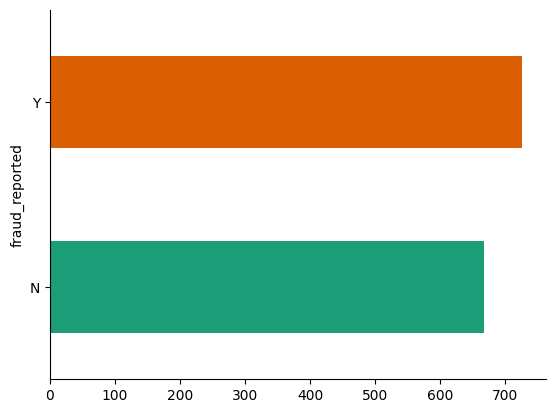

In [31]:
for column in data.columns:
  data.groupby(column).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
  plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


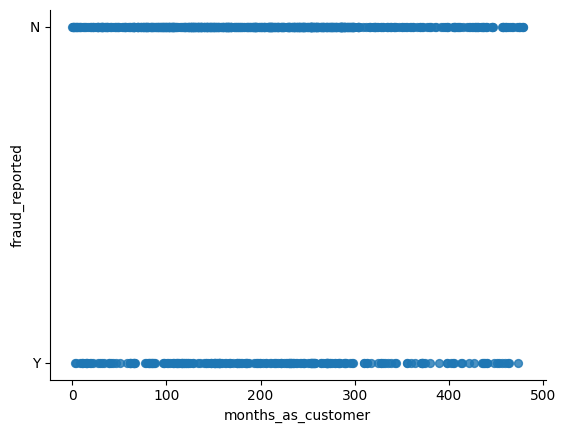

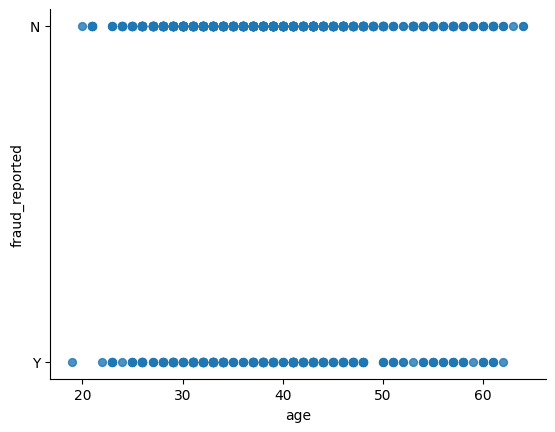

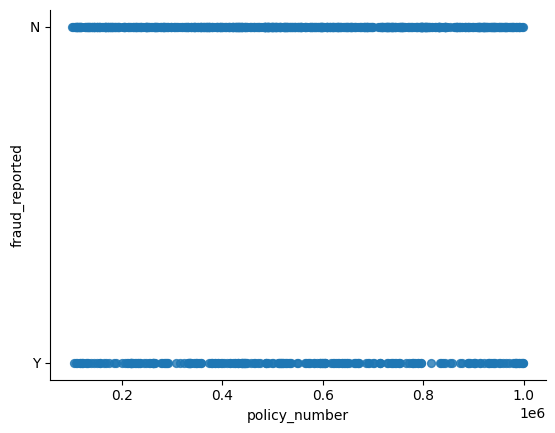

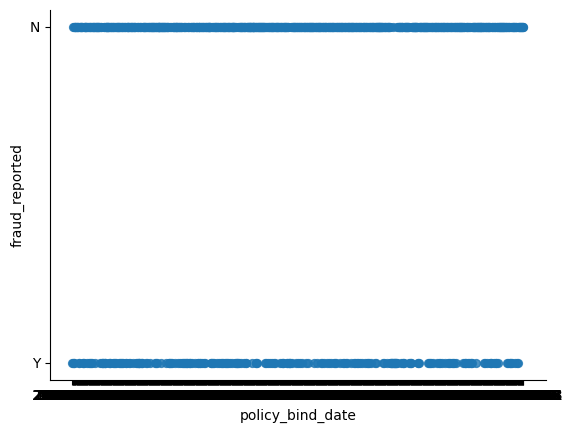

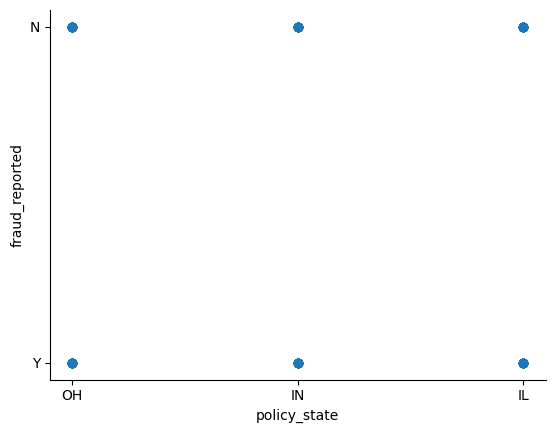

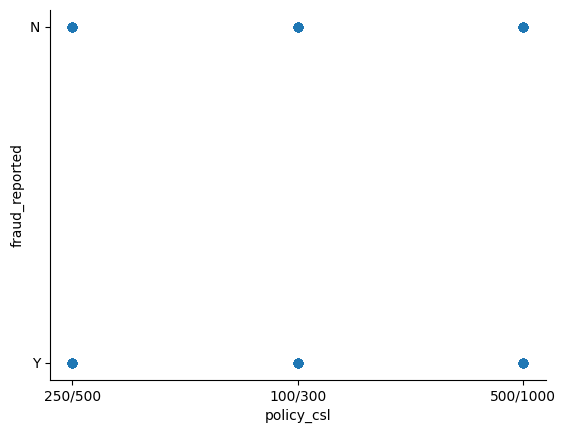

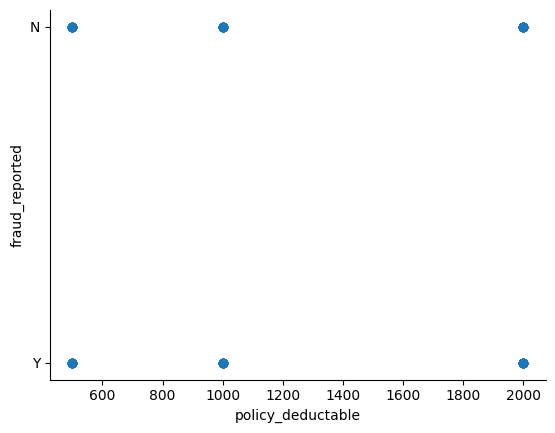

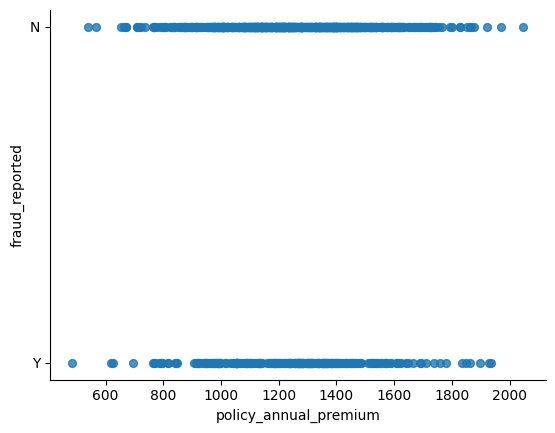

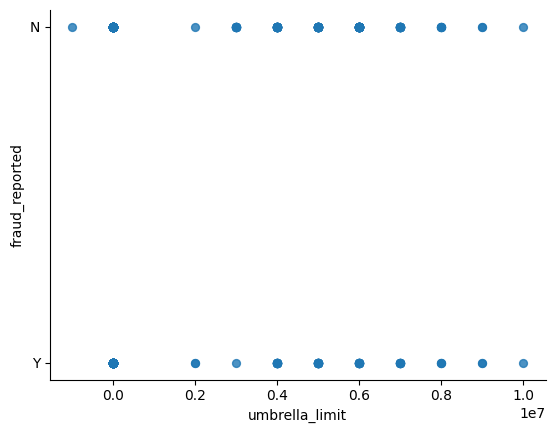

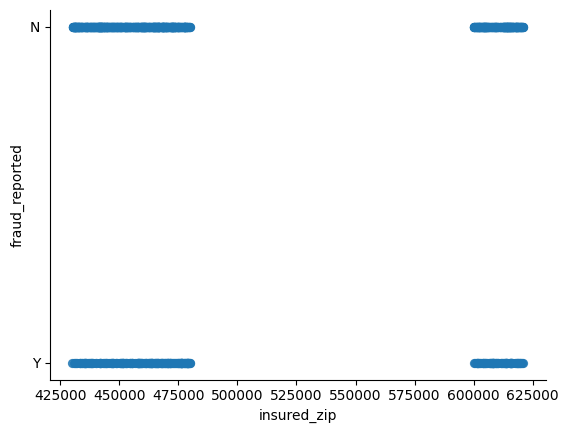

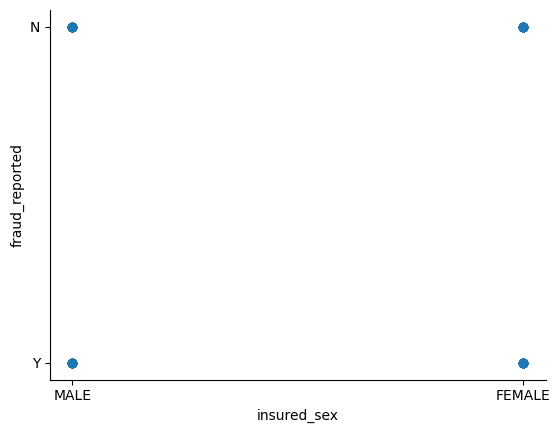

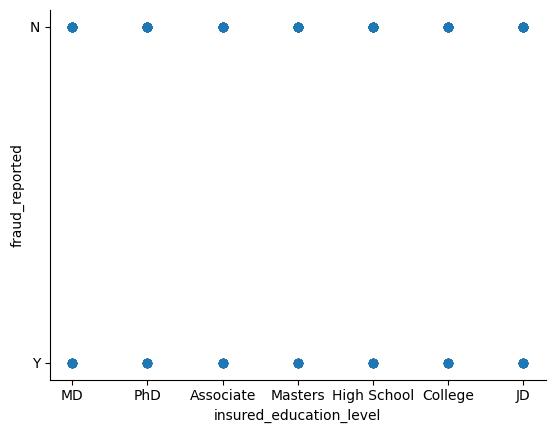

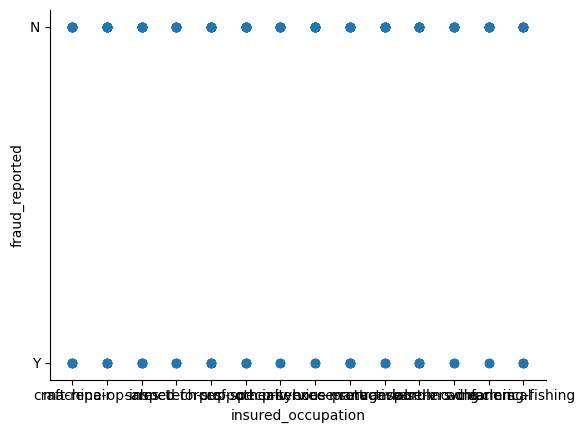

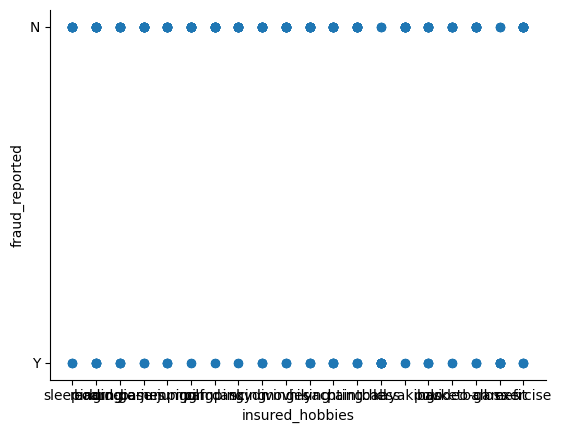

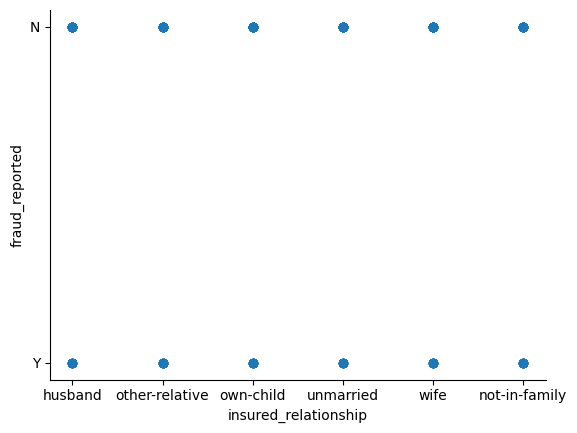

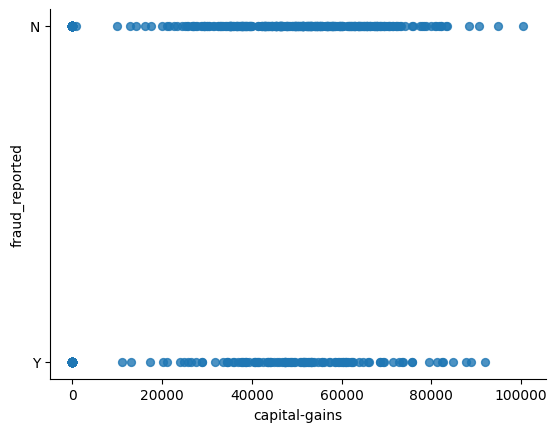

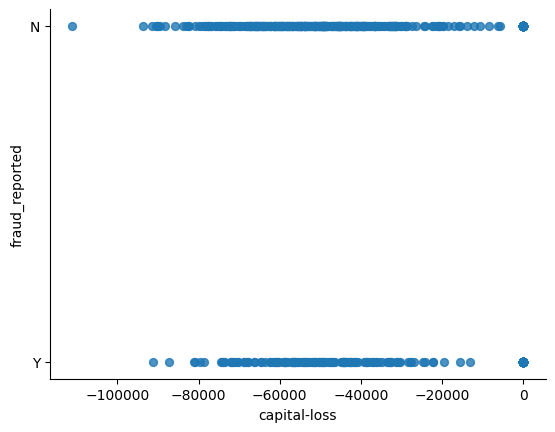

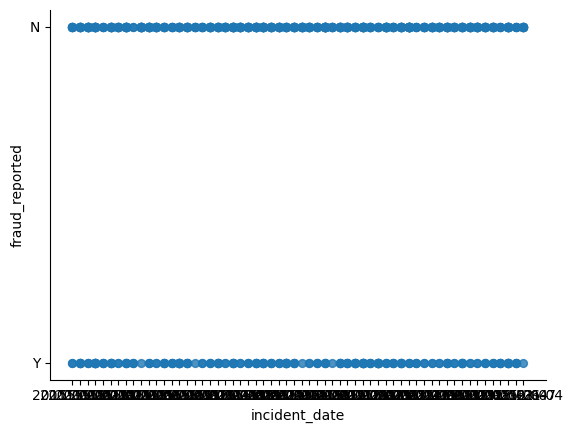

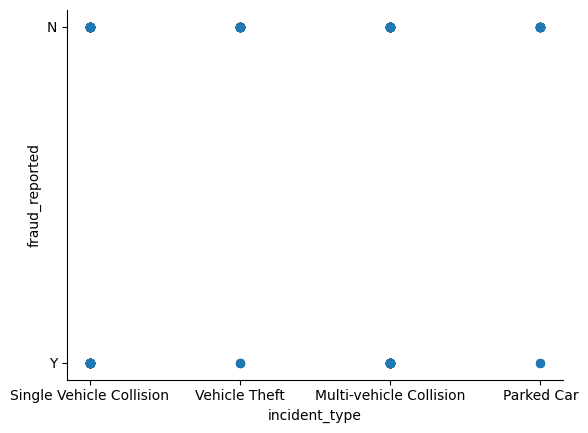

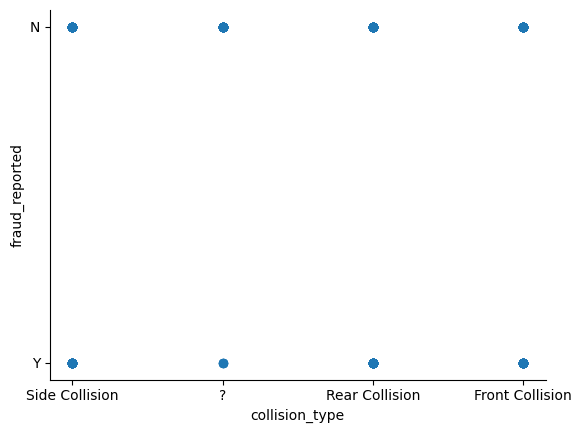

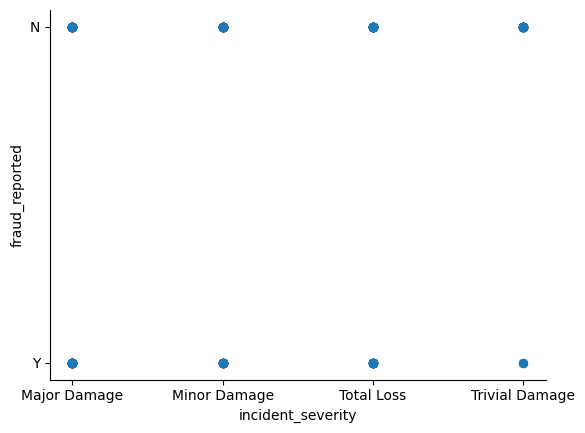

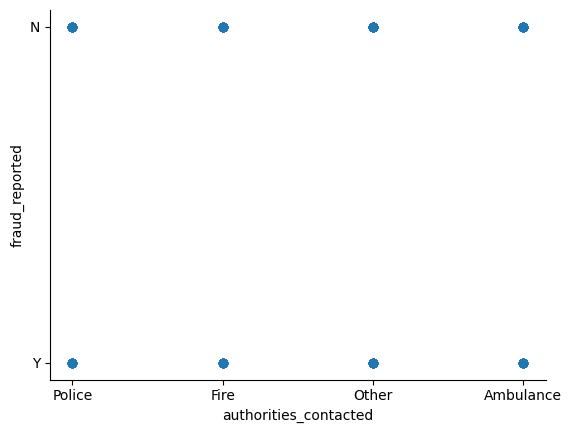

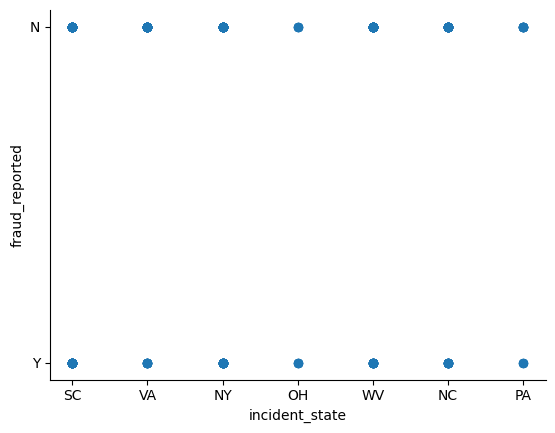

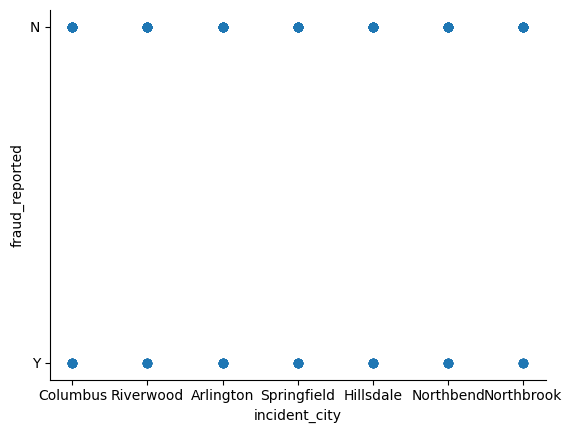

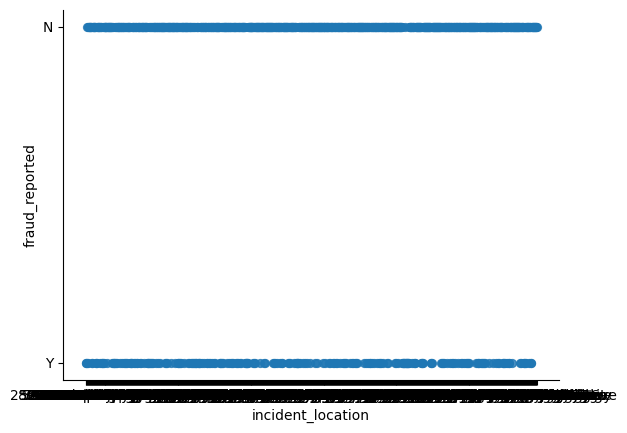

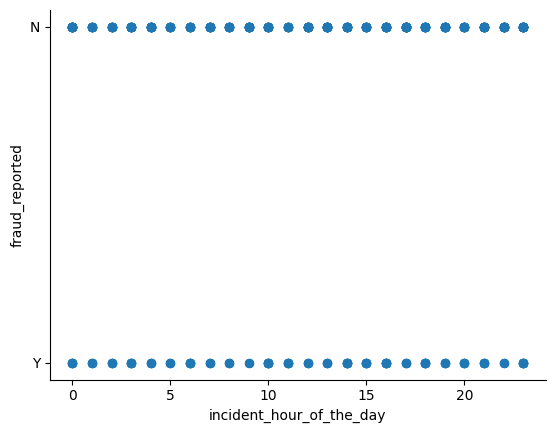

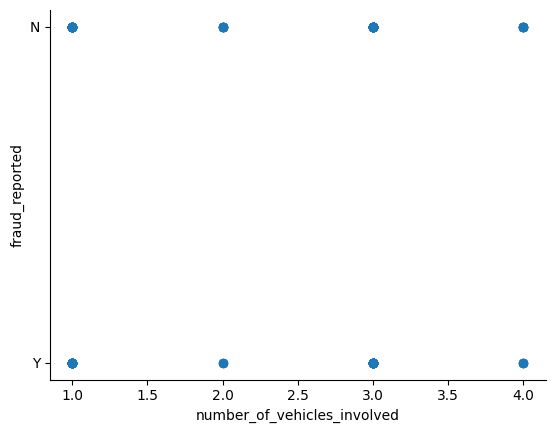

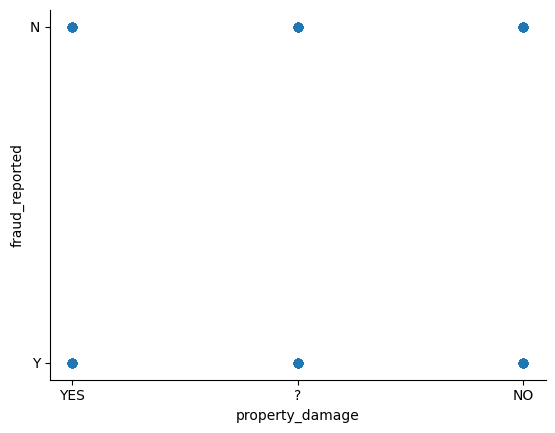

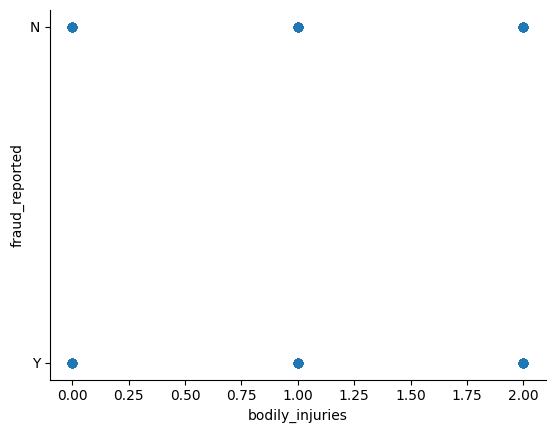

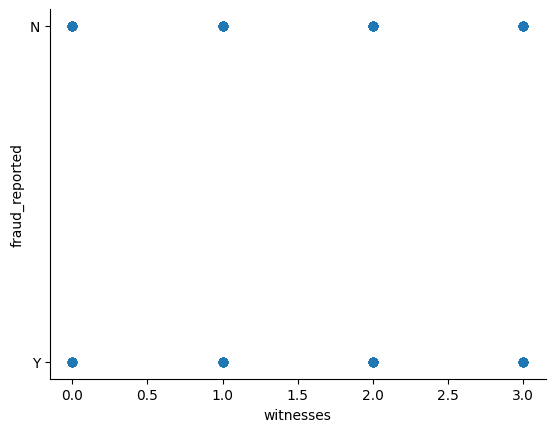

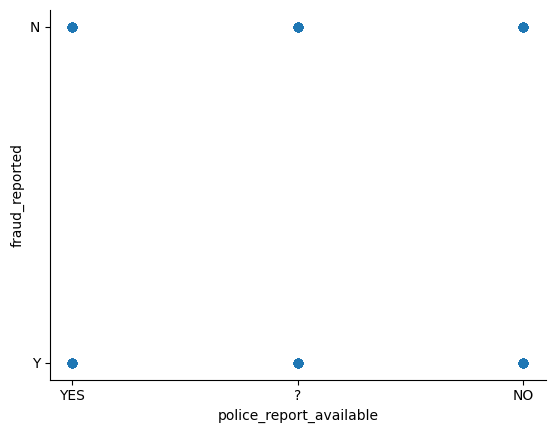

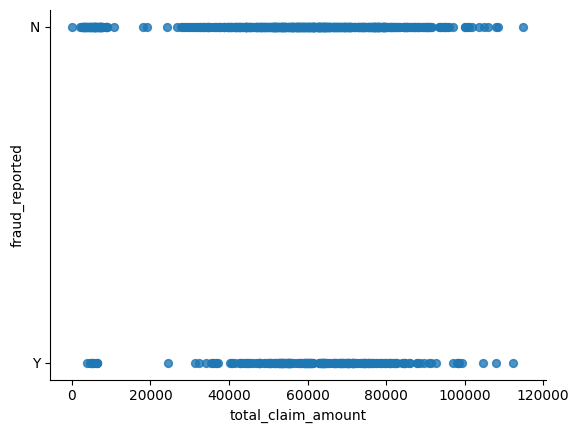

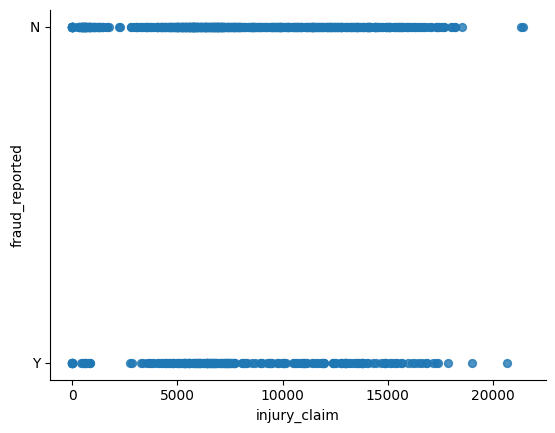

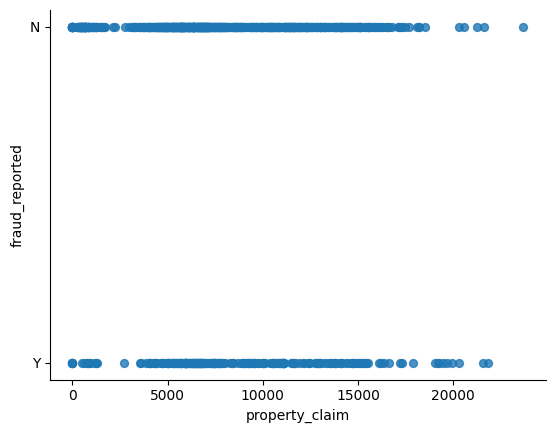

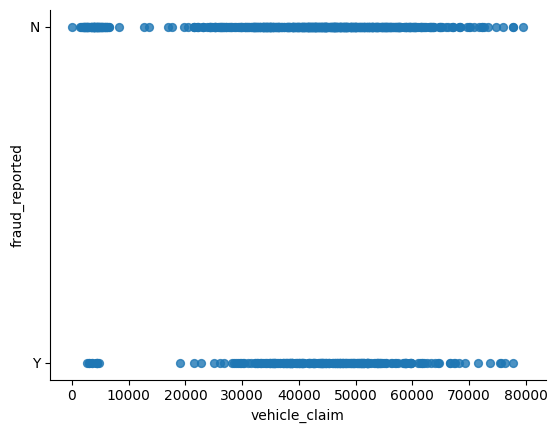

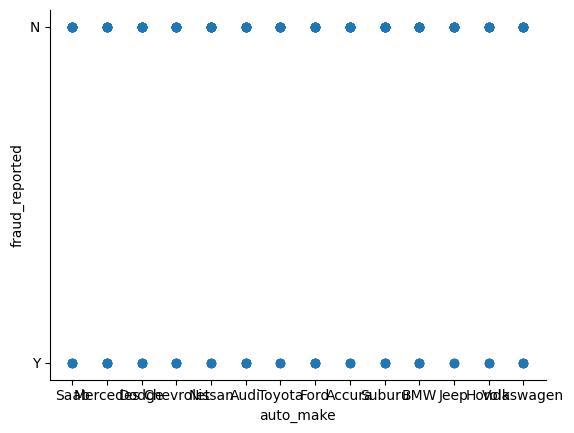

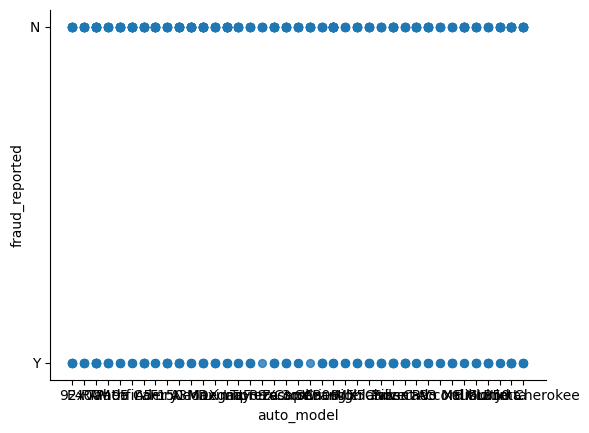

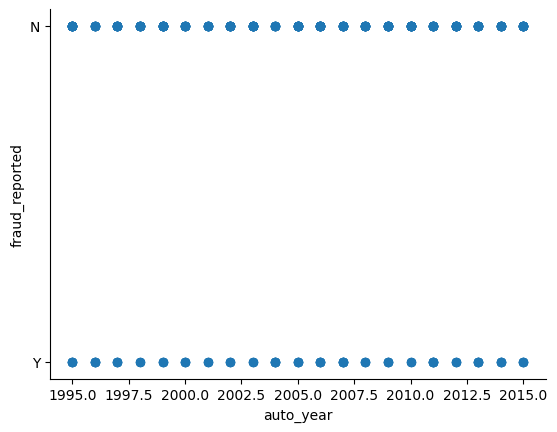

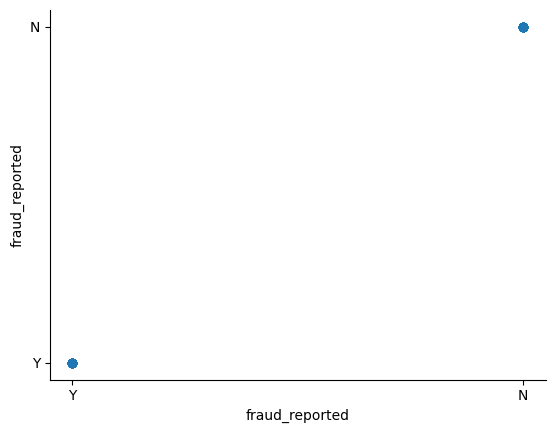

In [32]:
from matplotlib import pyplot as plt

for column in data.columns:
  data.plot(kind='scatter', x=column, y='fraud_reported', s=32, alpha=.8)
  plt.gca().spines[['top', 'right',]].set_visible(False)

In [43]:
label_encoder = LabelEncoder()


data["fraud_reported"] = label_encoder.fit_transform(data["fraud_reported"])

In [44]:
data.corr()

ValueError: could not convert string to float: '2014-10-17'

<ipython-input-13-5724ddc1e1a5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = data.corr(method="spearman")


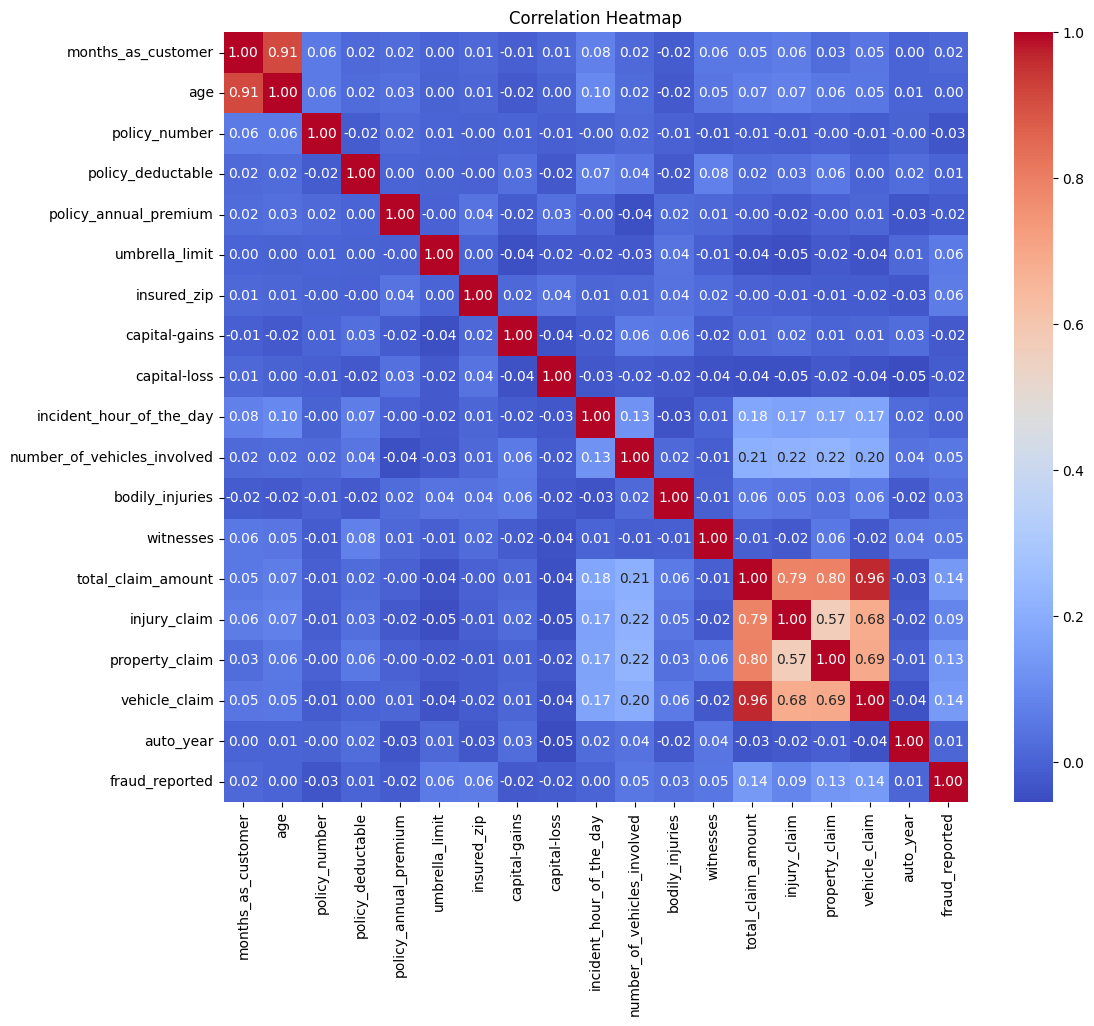

In [ ]:
corr_data = data.corr(method="spearman")



plt.figure(figsize=(12, 10))

sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')

# Show plot
plt.show()


**TO FIND UNIQUE VALUES OF OBJECT VALUES**

In [45]:
classes_with_too_many_instances = []


for i in data.columns:
  if data[i].dtype == 'object':
    if data[i].nunique() > 10:
      classes_with_too_many_instances.append(i)

    print(i,":", data[i].nunique())


print(classes_with_too_many_instances)

policy_bind_date : 865
policy_state : 3
policy_csl : 3
insured_sex : 2
insured_education_level : 7
insured_occupation : 14
insured_hobbies : 20
insured_relationship : 6
incident_type : 4
collision_type : 4
incident_severity : 4
authorities_contacted : 4
incident_state : 7
incident_city : 7
incident_location : 909
property_damage : 3
police_report_available : 3
auto_make : 14
auto_model : 39
['policy_bind_date', 'insured_occupation', 'insured_hobbies', 'incident_location', 'auto_make', 'auto_model']


In [46]:


for column in data.columns:
    # Check if '?' exists in the column
    if data[column].dtype == "object":

      if data[column].astype(str).str.contains('\?').any():
        print(f"'?' exists in column: {column}")

'?' exists in column: collision_type
'?' exists in column: property_damage
'?' exists in column: police_report_available


In [47]:
data.replace('?', np.nan, inplace=True)

Replace Missing Object (String) values with the most occurence

In [48]:
# prompt: replace nan with the mode of the each columns in th data dataframe

for column in data.columns:
  if data[column].dtype == "object":
    data[column].fillna(data[column].mode()[0], inplace=True)


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           909 non-null    int64  
 1   age                          909 non-null    int64  
 2   policy_number                909 non-null    int64  
 3   policy_bind_date             909 non-null    object 
 4   policy_state                 909 non-null    object 
 5   policy_csl                   909 non-null    object 
 6   policy_deductable            909 non-null    int64  
 7   policy_annual_premium        909 non-null    float64
 8   umbrella_limit               909 non-null    int64  
 9   insured_zip                  909 non-null    int64  
 10  insured_sex                  909 non-null    object 
 11  insured_education_level      909 non-null    object 
 12  insured_occupation           909 non-null    object 
 13  insured_hobbies          

In [50]:
# Compute correlation coefficients between numeric features and target variable
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
correlation_with_fraud = data[numeric_features].corrwith(data['fraud_reported'])

# Sort the correlations in descending order
sorted_correlation = correlation_with_fraud.abs().sort_values(ascending=False)

print("Correlation coefficients with 'fraud_reported':")
print(sorted_correlation)


Correlation coefficients with 'fraud_reported':
fraud_reported                 1.000000
vehicle_claim                  0.117877
total_claim_amount             0.110167
property_claim                 0.091455
umbrella_limit                 0.064335
witnesses                      0.051339
injury_claim                   0.038400
bodily_injuries                0.034726
policy_number                  0.025930
insured_zip                    0.022950
capital-gains                  0.020394
months_as_customer             0.018345
number_of_vehicles_involved    0.018269
capital-loss                   0.017911
policy_deductable              0.017593
incident_hour_of_the_day       0.017127
policy_annual_premium          0.016294
age                            0.011174
auto_year                      0.009445
dtype: float64


### DROP NOT NEEDED COLUMNS FOR MODEL TRAINING


In [52]:
data = data.drop([
  'policy_bind_date',
  "policy_number",
  "policy_csl",
  'insured_occupation',
  'insured_hobbies',
  'incident_location',
  'auto_make',
  "policy_number",
  "insured_zip",
  "capital-gains",
  "capital-loss" ,
  "policy_annual_premium",
  "auto_year",
  "incident_hour_of_the_day",
  'auto_model',
  "incident_state",
  "incident_city" ,
  "incident_location",
  "incident_hour_of_the_day",
  "insured_sex",
  "insured_relationship",
  "insured_education_level"],
    axis=1)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   months_as_customer           909 non-null    int64 
 1   age                          909 non-null    int64 
 2   policy_state                 909 non-null    object
 3   policy_deductable            909 non-null    int64 
 4   umbrella_limit               909 non-null    int64 
 5   incident_type                909 non-null    object
 6   collision_type               909 non-null    object
 7   incident_severity            909 non-null    object
 8   authorities_contacted        909 non-null    object
 9   number_of_vehicles_involved  909 non-null    int64 
 10  property_damage              909 non-null    object
 11  bodily_injuries              909 non-null    int64 
 12  witnesses                    909 non-null    int64 
 13  police_report_available      909 non-nul

In [116]:
data["property_claim"]

0      13020
1        780
2       3850
3       6340
5       6410
       ...  
995     8720
996    18080
997     7500
998     5220
999      920
Name: property_claim, Length: 909, dtype: int64

In [57]:
print(data["policy_state"].unique())
data["policy_state"].describe()

['OH' 'IN' 'IL']


count     909
unique      3
top        OH
freq      319
Name: policy_state, dtype: object

In [58]:
label_encoder = LabelEncoder()

data['policy_state'] = label_encoder.fit_transform(data['policy_state'])



print("Encoded Representation for Policy State")
for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {code}")

Encoded Representation for Policy State
IL: 0
IN: 1
OH: 2


In [59]:
label_encoder = LabelEncoder()

data['incident_type'] = label_encoder.fit_transform(data['incident_type'])


print("Encoded Representation for Incident Type")
for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {code}")

Encoded Representation for Incident Type
Multi-vehicle Collision: 0
Parked Car: 1
Single Vehicle Collision: 2
Vehicle Theft: 3


In [61]:
label_encoder = LabelEncoder()

data['authorities_contacted'] = label_encoder.fit_transform(data['authorities_contacted'])




print("Encoded Representation for Authorities Contacted")
for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {code}")

Encoded Representation for Authorities Contacted
Ambulance: 0
Fire: 1
Other: 2
Police: 3


In [62]:
label_encoder = LabelEncoder()

data['collision_type'] = label_encoder.fit_transform(data['collision_type'])


print("Encoded Representation for Collision Type")
for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {code}")


Encoded Representation for Collision Type
Front Collision: 0
Rear Collision: 1
Side Collision: 2


In [63]:

label_encoder = LabelEncoder()

data['incident_severity'] = label_encoder.fit_transform(data['incident_severity'])



print("Encoded Representation for Incident  Severity")
for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {code}")

Encoded Representation for Incident  Severity
Major Damage: 0
Minor Damage: 1
Total Loss: 2
Trivial Damage: 3


In [64]:

label_encoder = LabelEncoder()

data['property_damage'] = label_encoder.fit_transform(data['property_damage'])




print("Encoded Representation for Property Damage")
for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {code}")

Encoded Representation for Property Damage
NO: 0
YES: 1


In [66]:
label_encoder = LabelEncoder()

data['police_report_available'] = label_encoder.fit_transform(data['police_report_available'])


print("Encoded Representation for Police Report")
for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {code}")

Encoded Representation for Police Report
NO: 0
YES: 1


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   months_as_customer           909 non-null    int64
 1   age                          909 non-null    int64
 2   policy_state                 909 non-null    int64
 3   policy_deductable            909 non-null    int64
 4   umbrella_limit               909 non-null    int64
 5   incident_type                909 non-null    int64
 6   collision_type               909 non-null    int64
 7   incident_severity            909 non-null    int64
 8   authorities_contacted        909 non-null    int64
 9   number_of_vehicles_involved  909 non-null    int64
 10  property_damage              909 non-null    int64
 11  bodily_injuries              909 non-null    int64
 12  witnesses                    909 non-null    int64
 13  police_report_available      909 non-null    int64
 14 

### SEPERARING TO X AND Y

In [68]:
data

,months_as_customer,age,policy_state,policy_deductable,umbrella_limit,incident_type,collision_type,incident_severity,authorities_contacted,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,2,1000,0,2,2,0,3,1,1,1,2,1,71610,6510,13020,52080,1
1,228,42,1,2000,5000000,3,1,1,3,1,0,0,0,0,5070,780,780,3510,1
2,134,29,2,2000,5000000,0,1,1,3,3,0,2,3,0,34650,7700,3850,23100,0
3,256,41,0,2000,6000000,2,0,0,3,1,0,1,2,0,63400,6340,6340,50720,1
5,256,39,2,1000,0,0,1,0,1,3,0,0,2,0,64100,6410,6410,51280,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,1000,0,2,0,1,1,1,1,0,1,0,87200,17440,8720,61040,0
996,285,41,0,1000,0,2,1,0,1,1,1,2,3,0,108480,18080,18080,72320,0
997,130,34,2,500,3000000,0,2,1,3,3,0,2,3,1,67500,7500,7500,52500,0
998,458,62,0,2000,5000000,2,1,0,2,1,0,0,1,1,46980,5220,5220,36540,0


In [93]:
X = data.drop(["fraud_reported", "injury_claim", "vehicle_claim"], axis=1)

Y = data["fraud_reported"]

In [94]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

In [95]:
scaler = StandardScaler()

In [96]:
x_train_scaled = scaler.fit_transform(x_train)

x_trained = pd.DataFrame(x_train_scaled, columns=x_train.columns)

In [97]:
x_test_scaled = scaler.fit_transform(x_test)

x_tested = pd.DataFrame(x_test_scaled, columns=x_test.columns)

### Training of Model

#### SVC MODEL

In [98]:
svc_model = SVC()


svc_model.fit(x_trained, y_train)

y_pred = svc_model.predict(x_tested)


svc_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of SVC for testing data is :","{:.2f}%".format(100*svc_accuracy))

Accuracy of SVC for testing data is : 77.37%


In [99]:
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neural_network import MLPClassifier


In [100]:
log_model = LogisticRegression()

log_model.fit(x_trained, y_train)

y_pred = log_model.predict(x_tested)


log_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of LogisticRegression for testing data is :","{:.2f}%".format(100*log_accuracy))


Accuracy of LogisticRegression for testing data is : 79.56%


In [101]:
random_forest_model = RandomForestClassifier()

random_forest_model.fit(x_trained, y_train)

y_pred = random_forest_model.predict(x_tested)

random_forest_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of RandomForestClassifier for testing data is :","{:.2f}%".format(100*random_forest_accuracy))



Accuracy of RandomForestClassifier for testing data is : 79.56%


In [102]:
gradient_boost_model = GradientBoostingClassifier()

gradient_boost_model.fit(x_trained, y_train)

y_pred = gradient_boost_model.predict(x_tested)

gradient_boost_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of GradientBoostingClassifier for testing data is :","{:.2f}%".format(100*gradient_boost_accuracy))

Accuracy of GradientBoostingClassifier for testing data is : 79.56%


In [103]:
knn_model = KNeighborsClassifier()

knn_model.fit(x_trained, y_train)

y_pred = knn_model.predict(x_tested)

knn_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of KNeighborsClassifier for testing data is :","{:.2f}%".format(100*knn_accuracy))

Accuracy of KNeighborsClassifier for testing data is : 76.64%


In [104]:
decision_tree_model = DecisionTreeClassifier()

decision_tree_model.fit(x_trained, y_train)

y_pred = decision_tree_model.predict(x_tested)

decision_tree_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of DecisionTreeClassifier for testing data is :","{:.2f}%".format(100*decision_tree_accuracy))

Accuracy of DecisionTreeClassifier for testing data is : 78.10%


In [105]:
gaussian_model = GaussianNB()

gaussian_model.fit(x_trained, y_train)

y_pred = gaussian_model.predict(x_tested)

gaussian_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of GaussianNB for testing data is :","{:.2f}%".format(100*gaussian_accuracy))

Accuracy of GaussianNB for testing data is : 76.64%


In [106]:
mlp_model = MLPClassifier()

mlp_model.fit(x_trained, y_train)

y_pred = mlp_model.predict(x_tested)

mlp_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of MLPClassifier for testing data is :","{:.2f}%".format(100*mlp_accuracy))

Accuracy of MLPClassifier for testing data is : 78.10%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [107]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

xgb_model.fit(x_trained, y_train)

y_pred = xgb_model.predict(x_tested)

xgb_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of XGBClassifier for testing data is :","{:.2f}%".format(100*xgb_accuracy))


Accuracy of XGBClassifier for testing data is : 56.20%


In [108]:


knn_model = KNeighborsClassifier()

knn_model.fit(x_trained, y_train)

y_pred = knn_model.predict(x_tested)

knn_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of knnClassifier for testing data is :","{:.2f}%".format(100*knn_accuracy))

Accuracy of knnClassifier for testing data is : 76.64%


In [109]:
# Using Neural Network

import tensorflow as tf
from tensorflow import keras




model = keras.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(x_trained.shape[1],)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))



model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(x_trained, y_train, epochs=12, batch_size=32, validation_split=0.1)



Epoch 1/12
22/22 [==============================] - 1s 14ms/step - loss: 0.6397 - accuracy: 0.6412 - val_loss: 0.5255 - val_accuracy: 0.7436
Epoch 2/12
22/22 [==============================] - 0s 5ms/step - loss: 0.5441 - accuracy: 0.7277 - val_loss: 0.4950 - val_accuracy: 0.7564
Epoch 3/12
22/22 [==============================] - 0s 5ms/step - loss: 0.5118 - accuracy: 0.7464 - val_loss: 0.4675 - val_accuracy: 0.7692
Epoch 4/12
22/22 [==============================] - 0s 5ms/step - loss: 0.4737 - accuracy: 0.7752 - val_loss: 0.4538 - val_accuracy: 0.7949
Epoch 5/12
22/22 [==============================] - 0s 4ms/step - loss: 0.4575 - accuracy: 0.8084 - val_loss: 0.4455 - val_accuracy: 0.8333
Epoch 6/12
22/22 [==============================] - 0s 5ms/step - loss: 0.4402 - accuracy: 0.8199 - val_loss: 0.4581 - val_accuracy: 0.7564
Epoch 7/12
22/22 [==============================] - 0s 7ms/step - loss: 0.4241 - accuracy: 0.8285 - val_loss: 0.4485 - val_accuracy: 0.7692
Epoch 8/12
22/22 [=

In [110]:
# Neural Network Accuracy
loss, neaural_network_accuracy = model.evaluate(x_tested, y_test)


print("Accuracy of Neaural Network for testing data is :","{:.2f}%".format(100*neaural_network_accuracy))


5/5 [==============================] - 0s 10ms/step - loss: 0.4941 - accuracy: 0.7810
Accuracy of Neaural Network for testing data is : 78.10%


In [111]:
models = pd.DataFrame({
    'Model' : ['LogisticRegression','SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Gaussian', 'XGBoost', "Neural Network", "MLP"],
    'Score' : [log_accuracy,svc_accuracy,knn_accuracy, decision_tree_accuracy, random_forest_accuracy, gaussian_accuracy,xgb_accuracy, neaural_network_accuracy, mlp_accuracy]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,LogisticRegression,0.795620
4,Random Forest,0.795620
3,Decision Tree,0.781022
8,MLP,0.781022
7,Neural Network,0.781022
1,SVM,0.773723
2,KNN,0.766423
5,Gaussian,0.766423
6,XGBoost,0.562044


<ipython-input-112-4fbb6c7b99ca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot =sns.barplot(data=models,x='Score', y='Model',palette='bright',order=models.sort_values('Score',ascending=False).Model,ax=ax)


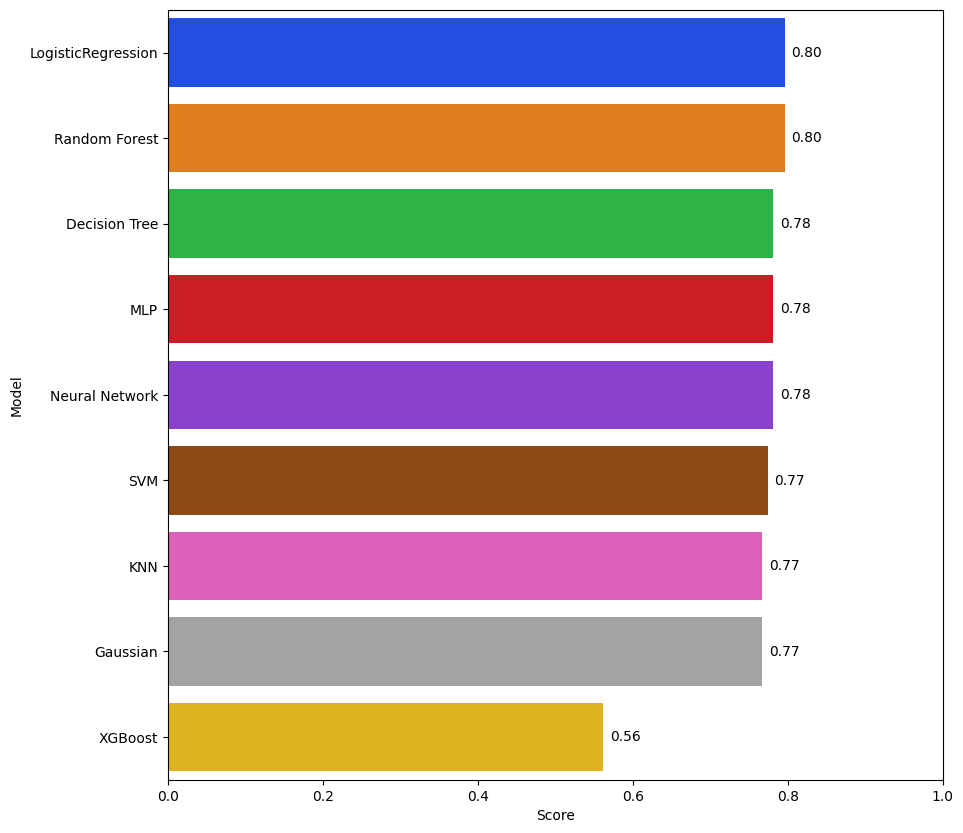

In [112]:
fig,ax = plt.subplots(figsize=(10,10))
barplot =sns.barplot(data=models,x='Score', y='Model',palette='bright',order=models.sort_values('Score',ascending=False).Model,ax=ax)
ax.set(xlim=(0,1))
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

## Saving the Mdoel

### HYPER PARAMETER TUNING

LOGISTIC REGRESSION


In [113]:
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse regularization strength
    'solver': ['liblinear', 'lbfgs']  # Solvers for Logistic Regression
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']  # Different kernel functions for SVM
}

param_grid_random_forest = {
    'n_estimators': [100, 200, 500],  # Number of trees in the forest
    'max_depth': [4, 8, 16]  # Maximum depth of individual trees
}

param_grid_knn = {
    'n_neighbors': [3, 5, 10],  # Number of neighbors to consider
}

param_grid_xgboost = {
    'learning_rate': [0.05, 0.1, 0.2],  # Learning rate for boosting
    'n_estimators': [100, 200, 500]  # Number of boosting stages
}

param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (100, 50), (100, 100)],  # Number of neurons in hidden layers
    'activation': ['relu', 'tanh']  # Activation function for neurons
}

# Create and run GridSearchCV for each model
models = []
for model_name, model,  param_grid in [
    ('Logistic Regression', LogisticRegression(), param_grid_logistic),

    ('Gaussian Naive Bayes', GaussianNB(), None),  # No hyperparameters to tune for Naive Bayes

    ('SVC', SVC() ,  param_grid_svc),

    ('Random Forest', RandomForestClassifier(), param_grid_random_forest),

    ('KNN',KNeighborsClassifier(), param_grid_knn),

    ('XGBoost', XGBClassifier() , param_grid_xgboost),

    ('MLP', MLPClassifier(), param_grid_mlp)
]:
    if model_name != 'Gaussian Naive Bayes':  # Naive Bayes already instantiated
        model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
        model.fit(x_trained, y_train)
    else:
        model = model.fit(x_trained, y_train)  # Naive Bayes fit directly
    models.append((model_name, model))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [117]:
best_accuracy = 0
best_model = None
for model_name, model in models:
  if not isinstance(model, GaussianNB):

    y_pred =  model.best_estimator_.predict(x_tested)

    model_accuracy = accuracy_score(y_test, y_pred)

    if model_accuracy > best_accuracy:
            best_accuracy = model_accuracy
            best_model = model.best_estimator_


    print(f"\n Model acccuracy for {model_name}:", model_accuracy)






 Model acccuracy for Logistic Regression: 0.8029197080291971

 Model acccuracy for SVC: 0.8175182481751825

 Model acccuracy for Random Forest: 0.7956204379562044

 Model acccuracy for KNN: 0.7664233576642335

 Model acccuracy for XGBoost: 0.5547445255474452

 Model acccuracy for MLP: 0.8102189781021898


In [118]:
joblib.dump(best_model, 'insurace_fraud_model_SVC_Ignaz.pkl')

['insurace_fraud_model_SVC_Ignaz.pkl']